## Erin Rumelhart - Image

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as fits

from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb
from astropy import stats
import warnings
warnings.filterwarnings('ignore', category=Warning)

# Digitized Sky Survey (DSS)

The Digitized Sky Survey is a multiwavelength survey of the sky produced by scanning the photographic Sky Survey plates from the Palomar and UK Schmidt telescopes.

You can download images from the [ESO Online Digitized Sky Survey](http://archive.eso.org/dss/dss)

## Part 1:

- Download a 15 arcmin x 15 acrmin DSS-2-blue FITS image near the [North Galactic Pole](https://en.wikipedia.org/wiki/Galactic_coordinate_system)

- Download a 15 arcmin x 15 acrmin DSS-2-red FITS image near the [Galactic center](https://en.wikipedia.org/wiki/Galactic_coordinate_system).

* Plot the two images with coordinates
* Plot a 5-sigma cut of each of the images
* The images should be nice with labels

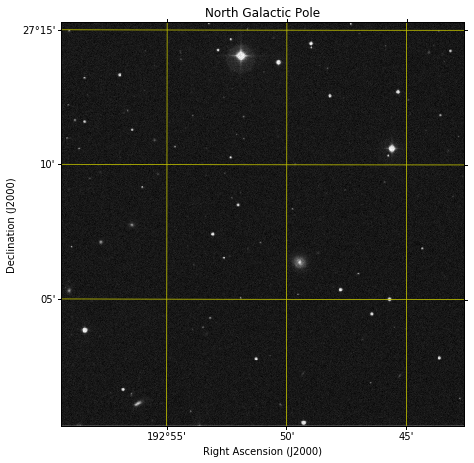

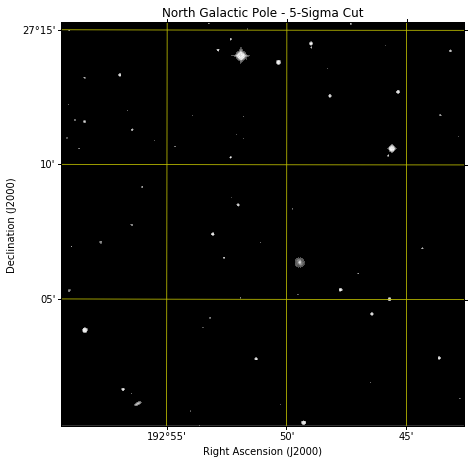

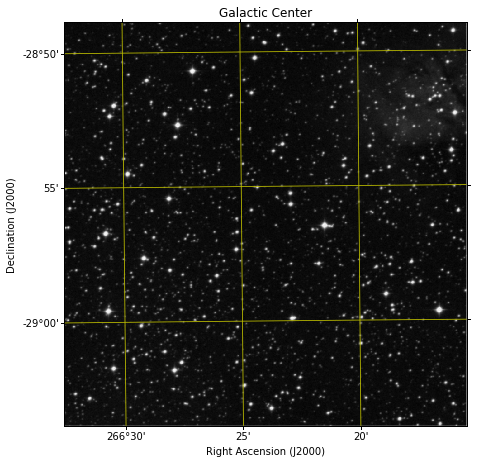

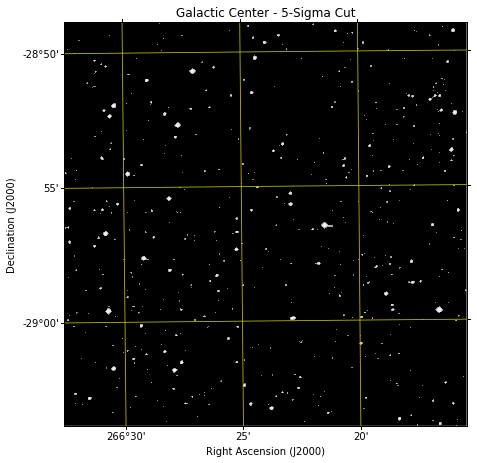

In [4]:
north_pole = "north_galactic_pole.fits"
north_pole_file = fits.open(north_pole)
north_pole_data = north_pole_file[0].data
north_pole_header = north_pole_file[0].header
north_wcs = WCS(north_pole_header)

fig = plt.figure()
ax = fig.add_subplot(111, projection=north_wcs)

fig.set_size_inches(6,6)
fig.tight_layout()

ax.grid(color='y', ls='-')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')
ax.set_title('North Galactic Pole')
ax.imshow(north_pole_data, origin='lower', cmap=plt.cm.gray);



np_clip_star = stats.sigma_clip(north_pole_data, sigma=5, iters=5) 
np_copy_data = np.copy(north_pole_data)
np_copy_data[~np_clip_star.mask] = north_pole_data.min()

fig = plt.figure()
ax = fig.add_subplot(111, projection=north_wcs)
fig.set_size_inches(6,6)
fig.tight_layout()

ax.grid(color='y', ls='-')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')
ax.set_title('North Galactic Pole - 5-Sigma Cut')
ax.imshow(np_copy_data, origin='lower', cmap=plt.cm.gray);



galactic_center = "galactic_center.fits"
galactic_center_file = fits.open(galactic_center)
galactic_center_data = galactic_center_file[0].data
galactic_center_header = galactic_center_file[0].header
center_wcs = WCS(galactic_center_header)

fig = plt.figure()
ax = fig.add_subplot(111, projection=center_wcs)

fig.set_size_inches(6,6)
fig.tight_layout()

ax.grid(color='y', ls='-')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')
ax.set_title('Galactic Center')

ax.imshow(galactic_center_data, origin='lower', cmap=plt.cm.gray);



gc_clip_star = stats.sigma_clip(galactic_center_data, sigma=5, iters=5) 
gc_copy_data = np.copy(galactic_center_data)
gc_copy_data[~gc_clip_star.mask] = galactic_center_data.min()

fig = plt.figure()
ax = fig.add_subplot(111, projection=center_wcs)
fig.set_size_inches(6,6)
fig.tight_layout()

ax.grid(color='y', ls='-')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')
ax.set_title('Galactic Center - 5-Sigma Cut')
ax.imshow(gc_copy_data, origin='lower', cmap=plt.cm.gray);

## Part 2:

- Pick a cool [Messier object](https://en.wikipedia.org/wiki/List_of_Messier_objects) with Declination  > 0.

* Download a DSS-2-infrared, DSS-2-red, and DSS-2-blue FITS images for the object.

- Create a pseudocolor RGB image from:

  * red = DSS-2-infrared
  * green = DSS-2-red
  * blue = DSS-2-blue

- You will have to experiment with the `stretch` to get a good image
* The image should be 10in x 10in, with labels.

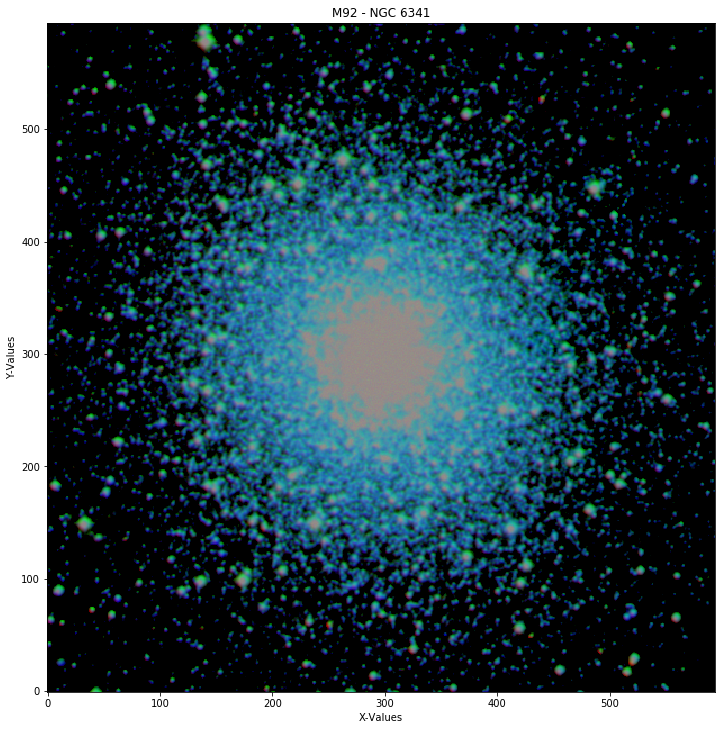

In [38]:
red_img = fits.getdata("m92_infrared.fits").astype(float)
green_img = fits.getdata("m92_red.fits").astype(float)
blue_img= fits.getdata("m92_blue.fits").astype(float)

clean_r =  red_img - np.median(red_img)
clean_g =  green_img - np.median(green_img)
clean_b =  blue_img - np.median(blue_img)

image = make_lupton_rgb(clean_r, clean_g, clean_b, stretch = 5000)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

fig.tight_layout()

ax.set_xlabel('X-Values')
ax.set_ylabel('Y-Values')
ax.set_title('M92 - NGC 6341')

ax.imshow(image, origin='lower', cmap=plt.cm.gray);

## Part 3

For the next Astro 300 class we are going to use an online interface to the LaTeX scientific typesetting system. 
To do this, you will need to sign up for a free account on the ShareLaTeX system before the next class.

* Remember your account name and password, we will use them during class. 

* Please use the following link to sign up for the system: https://www.sharelatex.com?r=f33161ec&rm=d&rs=b 

### Due Tue Nov 21 - 5pm

- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`  